Building a Regression Model to Predict the Volume of BTC Currency

Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

Loading the dataset

In [39]:
dataset = pd.read_csv('C://Users//Martins//Desktop//Dataset//bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')
print(dataset.shape)
print(dataset.describe())

(4363457, 8)
          Timestamp       Open       High        Low      Close  Volume_(BTC)  \
count    4363457.00 3126480.00 3126480.00 3126480.00 3126480.00    3126480.00   
mean  1456468818.69    3674.66    3677.37    3671.73    3674.60          9.86   
std     75732961.91    3935.58    3939.08    3931.71    3935.49         32.29   
min   1325317920.00       3.80       3.80       1.50       1.50          0.00   
25%   1390769760.00     410.00     410.24     409.83     410.00          0.40   
50%   1456609920.00    1175.14    1175.77    1174.82    1175.14          1.99   
75%   1522061760.00    6931.18    6935.78    6926.79    6931.23          7.64   
max   1587513600.00   19665.76   19666.00   19649.96   19665.75       5853.85   

       Volume_(Currency)  Weighted_Price  
count         3126480.00      3126480.00  
mean            28844.59         3674.57  
std            101027.68         3935.46  
min                 0.00            3.80  
25%               350.38          410.00  

In [40]:
dataset.isnull().sum()

Timestamp                  0
Open                 1236977
High                 1236977
Low                  1236977
Close                1236977
Volume_(BTC)         1236977
Volume_(Currency)    1236977
Weighted_Price       1236977
dtype: int64

<AxesSubplot:>

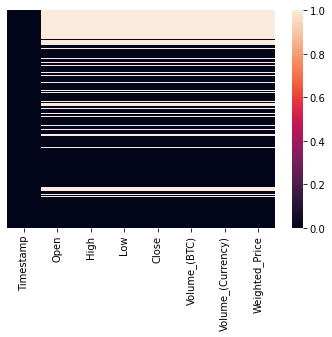

In [41]:
sns.heatmap(dataset.isnull(),yticklabels=False)

<AxesSubplot:>

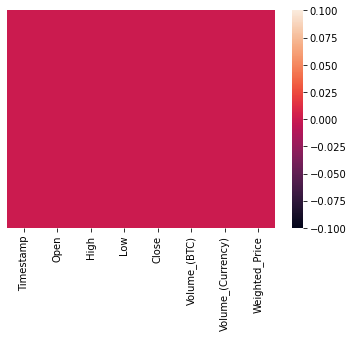

In [42]:
dataset.dropna(inplace=True)
dataset.shape
sns.heatmap(dataset.isnull(), yticklabels=False)

In [37]:
dataset.shape

(3126480, 7)

Using the Concept of Correlation to Determine the Dependency of the Variables 

In [32]:
pd.options.display.float_format ="{:.2f}" .format
dataset.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.00,0.78,0.78,0.78,0.78,-0.10,0.20,0.78
Open,0.78,1.00,1.00,1.00,1.00,-0.06,0.31,1.00
High,0.78,1.00,1.00,1.00,1.00,-0.06,0.31,1.00
Low,0.78,1.00,1.00,1.00,1.00,-0.06,0.31,1.00
Close,0.78,1.00,1.00,1.00,1.00,-0.06,0.31,1.00
Volume_(BTC),-0.10,-0.06,-0.06,-0.06,-0.06,1.00,0.42,-0.06
Volume_(Currency),0.20,0.31,0.31,0.31,0.31,0.42,1.00,0.31
Weighted_Price,0.78,1.00,1.00,1.00,1.00,-0.06,0.31,1.00


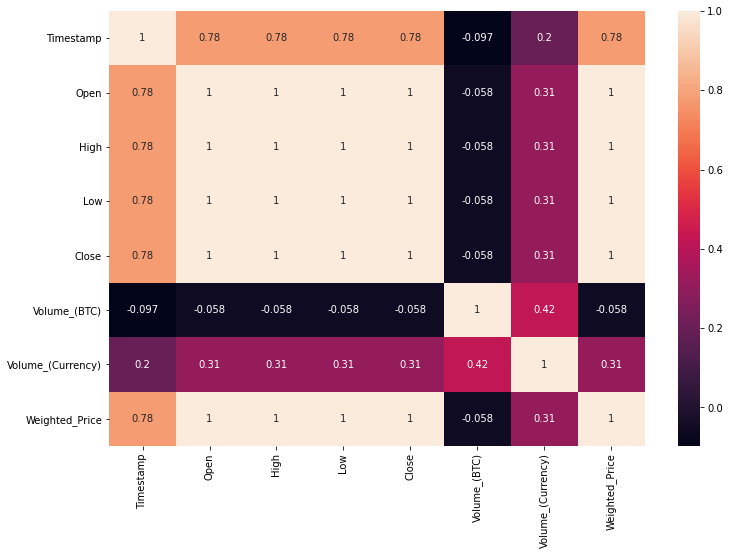

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

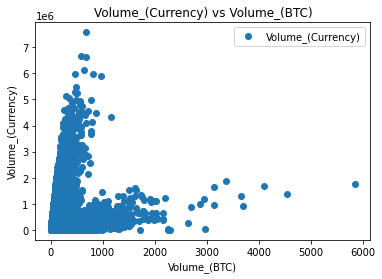

In [34]:
# The correlation shows the Volume_(BTC) has the highest positive correlation with Volume_(Currency)

dataset.plot(x='Volume_(BTC)', y='Volume_(Currency)', style='o')
plt.xlabel('Volume_(BTC)')
plt.ylabel('Volume_(Currency)')
plt.title('Volume_(Currency) vs Volume_(BTC)')
plt.show()

Converting Timestamp to Date Using Pandas Library

In [35]:
dataset["Date"]=dataset.Timestamp.apply(lambda x: pd.datetime.fromtimestamp(x).date())
dataset.head()

<ipython-input-35-d3dfa5449e76>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dataset["Date"]=dataset.Timestamp.apply(lambda x: pd.datetime.fromtimestamp(x).date())


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-30
478,1325346600,4.39,4.39,4.39,4.39,48.00,210.72,4.39,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.86,171.38,4.53,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.00,41.22,4.58,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.50,6.88,4.58,2011-12-31


In [36]:
dataset.drop(['Timestamp'], axis = 1,inplace=True)
dataset.set_index('Date', inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3126480 entries, 2011-12-30 to 2020-04-21
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Open               float64
 1   High               float64
 2   Low                float64
 3   Close              float64
 4   Volume_(BTC)       float64
 5   Volume_(Currency)  float64
 6   Weighted_Price     float64
dtypes: float64(7)
memory usage: 190.8+ MB
